In [0]:
# author: Asmaa ~ 2019
# ----------------------

# import libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Preparation

### Load the data

In [6]:
# load data and assign it 
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Understand the data

In [7]:
# print dimensions
print('dimensions of training images:', training_images.shape)
print('dimensions of training labels:', training_labels.shape)
print('dimensions of test images:', test_images.shape)
print('dimensions of test labels:', test_labels.shape)

dimensions of training images: (60000, 28, 28)
dimensions of training labels: (60000,)
dimensions of test images: (10000, 28, 28)
dimensions of test labels: (10000,)


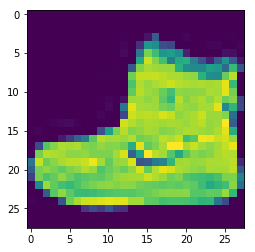

In [8]:
# visualize a sample of the data to understand better

# show as an image
plt.imshow(training_images[0])

In [9]:
# show sample label
print(training_labels[0])

9


In [10]:
# show image as pixels
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [0]:
# for better performance we have to normalize the data so it will be between 0,1
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Setting the network

In [0]:
# initialize the model
model = Sequential()

# set the structure of the network

# add input layer, 27*27 images will be flattened
model.add(Flatten())

# add a hidden layer with 128 units and set the activation function
model.add(Dense(units = 128, activation = tf.nn.relu))

# add output layer with 10 units (number of categories in fashion mnist) and set activation function
model.add(Dense(units = 10, activation = tf.nn.softmax))

# print number of layers
print(len(model.layers))

In [13]:
# set functional properties
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# start training
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4997 - acc: 0.8247
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3765 - acc: 0.8644
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3369 - acc: 0.8764
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3132 - acc: 0.8853
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2935 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2790 - acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2680 - acc: 0.8997
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2562 - acc: 0.9042
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2476 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 4s 67us/sample - loss: 

In [14]:
# check model accuracy on test set
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3376 - acc: 0.8780


[0.33758308206796644, 0.878]

# Stopping training due to accuracy value by Callbacks


In [0]:
class fashionCallback(tf.keras.callbacks.Callback):
  # when to stop? it is better to stop at the end of an epoch
  def on_epoch_end(self, epoch, logs={}):
    # this function has access to the log
    if(logs.get('acc') > 0.95):
      print('\nReached 0.95 accuracy so stop training!')
      self.model.stop_training = True

In [16]:
# intialize a callback object
callback = fashionCallback()

# retrain the model
# epochs = max epochs
model.fit(training_images, training_labels, epochs=100, callbacks=[callback])

Epoch 1/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2318 - acc: 0.9124
Epoch 2/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2219 - acc: 0.9171
Epoch 3/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2175 - acc: 0.9183
Epoch 4/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2115 - acc: 0.9206
Epoch 5/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2034 - acc: 0.9242
Epoch 6/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1979 - acc: 0.9258
Epoch 7/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1928 - acc: 0.9277
Epoch 8/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1896 - acc: 0.9286
Epoch 9/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1846 - acc: 0.9313
Epoch 10/100
60000/60000 [==============================] - 4s 67us/sampl